<a href="https://colab.research.google.com/github/MausmiSinha/Facial_Detection_Project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt
%matplotlib inline

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [2]:
picture_size = 48     # in pixel 48x48 pixel
folder_path = "D:\Projects\Facial_Detection_Project\images"

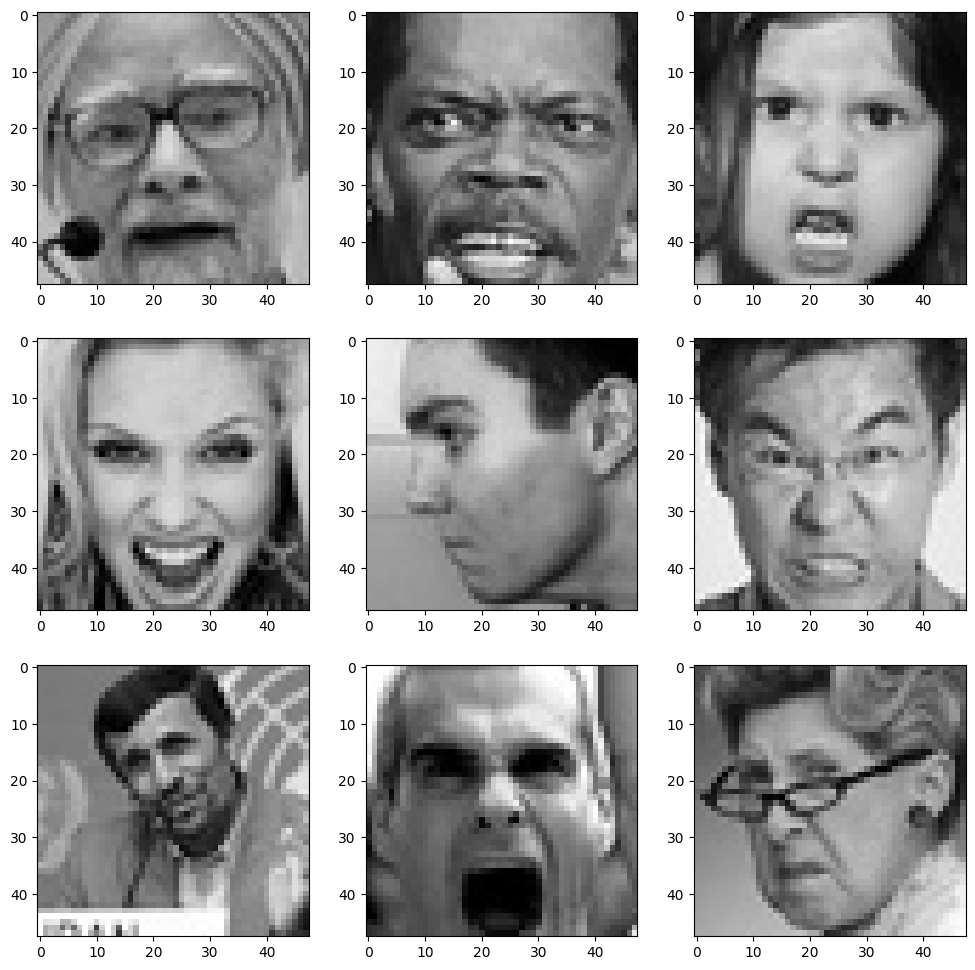

In [3]:
expression = 'angry'
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"/train/"+expression+"/"+
                  os.listdir(folder_path + "/train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [4]:
batch_size  = 64

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"/train/",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical')

test_set = datagen_val.flow_from_directory( folder_path+"/validation/",
                                            target_size = (picture_size,picture_size),
                                            color_mode = "grayscale",
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [5]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(32 ,kernel_size=(3, 3), activation='relu',input_shape = (48,48,1)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2nd CNN Layer
model.add(Conv2D(128 ,kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Flattening the layers:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

#Compiling the layer:
opti = Adam(lr = 0.0001, decay = 1e-6)
model.compile(optimizer=opti,loss='categorical_crossentropy', metrics=['accuracy'])

#Printing the summary:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

c:\Users\bhoga\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
#Training the Model:
model_info = model.fit_generator(
    train_set,
    steps_per_epoch = 28821//64,
    epochs = 50,
    validation_data = test_set,
    validation_steps = 7066//64
)

Epoch 1/50


C:\Users\bhoga\AppData\Local\Temp\ipykernel_23288\246256525.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_info = model.fit_generator(


450/450 [==============================] - 211s 468ms/step - loss: 2.6152 - accuracy: 0.1806 - val_loss: 2.0117 - val_accuracy: 0.1837
Epoch 2/50
450/450 [==============================] - 209s 465ms/step - loss: 2.2354 - accuracy: 0.2276 - val_loss: 1.9752 - val_accuracy: 0.2723
Epoch 3/50
450/450 [==============================] - 213s 473ms/step - loss: 2.0402 - accuracy: 0.2761 - val_loss: 1.6394 - val_accuracy: 0.3619
Epoch 4/50
450/450 [==============================] - 211s 468ms/step - loss: 1.8777 - accuracy: 0.3252 - val_loss: 1.5962 - val_accuracy: 0.4126
Epoch 5/50
450/450 [==============================] - 210s 466ms/step - loss: 1.7235 - accuracy: 0.3712 - val_loss: 1.4551 - val_accuracy: 0.4585
Epoch 6/50
450/450 [==============================] - 547s 1s/step - loss: 1.6201 - accuracy: 0.4067 - val_loss: 1.3648 - val_accuracy: 0.4905
Epoch 7/50
450/450 [==============================] - 269s 596ms/step - loss: 1.5192 - accuracy: 0.4351 - val_loss: 1.3194 - val_accuracy:

In [8]:
#Saving the Model Structure in JSON file:
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)

#Save trained model weights in .h5 file:
model.save_weights("new_model.h5")